# Housing Data

## Abstract

The real estate markets present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues.

The Aim of the project is to build the best fitting model using logistic regression and the best features.We will be predicting the binary variable waterfront.

Column Details:

- Date
- Price
- Bedrooms
- Bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- street
- city
- statezip
- country

**Multi class Categorical values -** bedrooms, bathrooms
**Binary categorical values -** Waterfront

# Part B - Logistic Model

## Imported the needed libraries

In [117]:
#importing needed libraries
%matplotlib inline 
import matplotlib.pyplot as plt #Visualisation
import numpy as np #Linear Algebra
import pandas as pd #Data processing
from scipy import stats #Numerical Routines
import seaborn as sns #Visualisation
import re
#Machine Learning Library
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import pylab as pl
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [118]:
#import the dataset 
#Used read_csv function of pandas library to import the dataset and the decimal is used 
df = pd.read_csv("data.csv",sep = ',')
df.head() #used .head() function of pandas library to show first 5 rows of the dataset

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [6]:
df.apply(lambda x: sum(x.isnull()), axis=0)
#There are missing values as we can see below in respective columns:

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [45]:
df['bedrooms'].unique()

array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.])

In [12]:
df['bathrooms'].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
8.00       1
6.50       1
5.75       1
6.75       1
Name: bathrooms, dtype: int64

C:\Users\owner\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


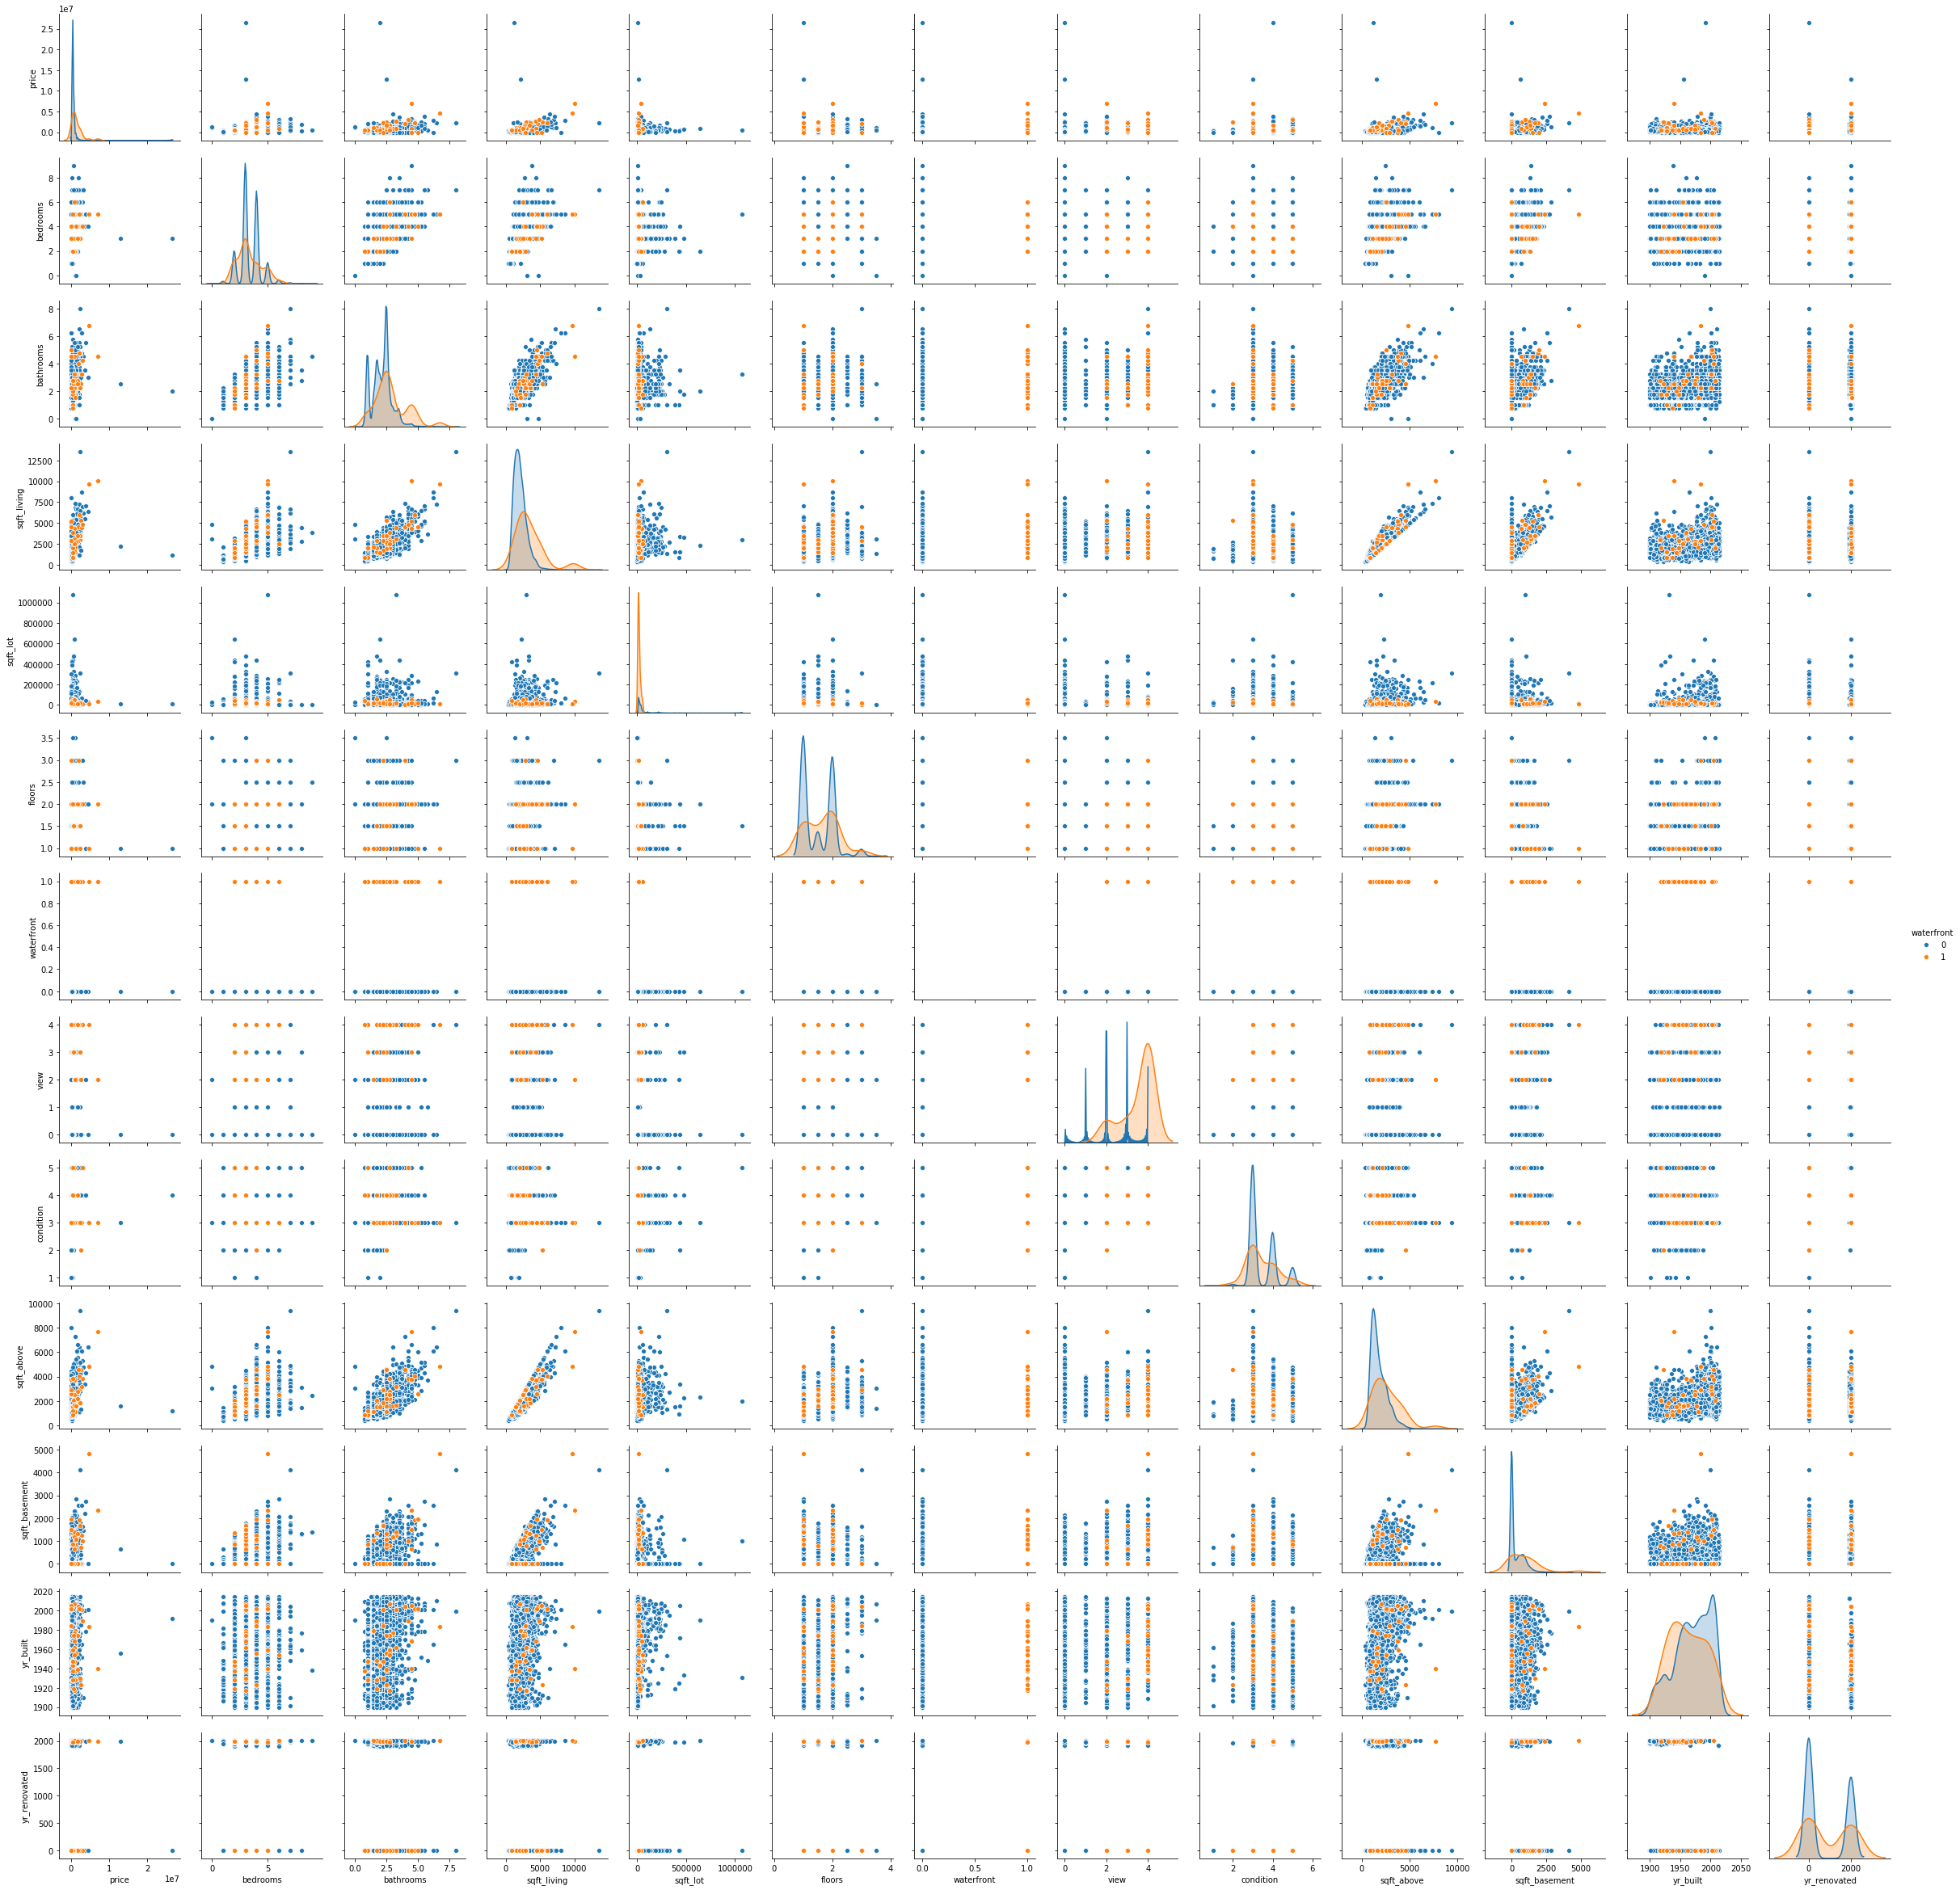

In [116]:
sns.pairplot(df, hue='waterfront', size=2.5)

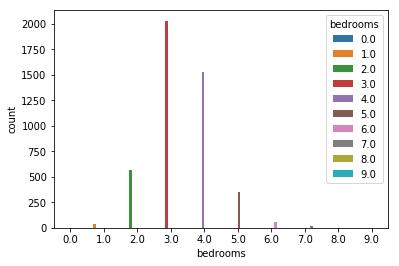

In [13]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="bedrooms", data=df, hue="bedrooms")
plt.show()
#The dataset is male skewed as the number of females taking loans is fairly less as compared to the number of males taken.

***

# Model 1

**Implemented logistic regression model**  
**Target -**     
- waterfront

**Predictors -**
- sqft_living    
- yr_built     
- sqft_above         
- bathrooms    
- floors        
- price

In [56]:
X=df[["sqft_living","yr_built","sqft_above","bathrooms","floors","price"]]
X

,sqft_living,yr_built,sqft_above,bathrooms,floors,price
0,1340,1955,1340,1.50,1.5,3.130000e+05
1,3650,1921,3370,2.50,2.0,2.384000e+06
2,1930,1966,1930,2.00,1.0,3.420000e+05
3,2000,1963,1000,2.25,1.0,4.200000e+05
4,1940,1976,1140,2.50,1.0,5.500000e+05
5,880,1938,880,1.00,1.0,4.900000e+05
6,1350,1976,1350,2.00,1.0,3.350000e+05
7,2710,1989,2710,2.50,2.0,4.820000e+05
8,2430,1985,1570,2.50,1.0,4.525000e+05
9,1520,1945,1520,2.00,1.5,6.400000e+05


In [57]:
Y=df[['waterfront']]
Y

,waterfront
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [58]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)



LRm.predict_proba(x_test)  # The returned estimates for all classes are ordered by the label of classes.

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.99598913, 0.00401087],
       [0.99420375, 0.00579625],
       [0.99796439, 0.00203561],
       ...,
       [0.997014  , 0.002986  ],
       [0.99695865, 0.00304135],
       [0.99768535, 0.00231465]])

In [59]:
LRm.coef_

array([[ 6.88959667e-04, -3.33793711e-03, -1.57068364e-04,
        -3.69191413e-07, -8.99884742e-07,  1.94374786e-07]])

In [60]:
LRm.intercept_

array([-1.66385401e-06])

In [62]:
LRm.decision_function(x_test) # Predict confidence scores for samples.

array([-5.51472734, -5.14473066, -6.19492153, -5.090688  , -4.88953426,
       -6.11372291, -5.01402934, -4.67767066, -5.54038594, -4.02263726,
       -5.28324899, -5.26292936, -4.2022953 , -5.25489032, -5.28956359,
       -6.01512149, -5.39114439, -5.37781879, -4.42945337, -5.78104737,
       -5.69114952, -4.72405645, -5.80979686, -5.58824925, -4.64130381,
       -5.8370844 , -5.24679447, -5.0997546 , -5.89824666, -5.13052431,
       -5.36920398, -5.83894281, -5.40313941, -5.18218031, -5.72097406,
       -5.54605419, -5.73334825, -5.48992558, -5.71539584, -5.29016032,
       -4.83476574, -5.58003894, -5.59704297, -4.76745814, -5.77050705,
       -5.12685272, -4.76714633, -4.51618778, -5.59264066, -5.20633639,
       -5.22883346, -5.13982419, -5.33370215, -5.46772455, -4.82714684,
       -5.34208563, -5.55409664, -5.94019471, -5.45069639, -4.4405463 ,
       -5.05706201, -4.90934607, -5.60957119, -5.43093257, -5.11501627,
       -5.98742388, -5.73571242, -6.06845996, -4.77573492, -5.08

In [63]:
LRm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [72]:
y_pred = LRm.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy score using Logistic regression is 0.9918478260869565
RMSE is 0.0902893898143269


In [67]:
#confusion matrix
confusion_matrix(y_test, y_pred) 
#The confusion matrix shows that therer are 36 true positives for males on either axes and 4 for females versus males axes which
# is in sync with the plot of females and males shown before.

array([[1826,    0],
       [  14,    0]], dtype=int64)

In [68]:
#Classification Report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1826
           1       0.00      0.00      0.00        14

   micro avg       0.99      0.99      0.99      1840
   macro avg       0.50      0.50      0.50      1840
weighted avg       0.98      0.99      0.99      1840



C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


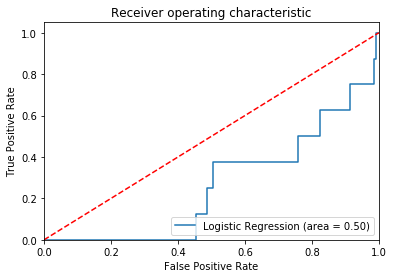

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LRm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, LRm.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [120]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [121]:
fpr, tpr, threshold = roc_curve(y_test,y_pred_prob)

In [122]:
print(fpr, tpr, threshold)

[0.         0.00109649 0.45394737 0.45394737 0.4879386  0.4879386
 0.50438596 0.50438596 0.75877193 0.75877193 0.8245614  0.8245614
 0.91337719 0.91337719 0.98574561 0.98574561 0.99013158 0.99013158
 1.        ] [0.    0.    0.    0.125 0.125 0.25  0.25  0.375 0.375 0.5   0.5   0.625
 0.625 0.75  0.75  0.875 0.875 1.    1.   ] [1.18563105e+00 1.85631047e-01 7.46920391e-03 7.44975911e-03
 6.61462062e-03 6.54128973e-03 6.01348041e-03 5.99496199e-03
 1.25351172e-03 1.25263214e-03 7.49382659e-04 7.38221078e-04
 1.59797953e-04 1.59630535e-04 6.67354966e-06 5.93676040e-06
 3.98787026e-06 1.82111928e-06 9.53171442e-09]


In [ ]:
# The above show the false positive rate, true positive rate and the threshold after which the roc under the curve changes.

***

# Model 2

**Implemented logistic regression model**  
**Target -**     
- waterfront

**Predictors -**
- sqft_living    
- view     
- sqft_basement         
- bathrooms    
- floors        
- price

In [105]:
X=df[["sqft_living","view","bathrooms","floors","price"]]
Y=df[['waterfront']]

In [106]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)



LRm.predict_proba(x_test)  # The returned estimates for all classes are ordered by the label of classes.

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.99491482, 0.00508518],
       [0.9987192 , 0.0012808 ],
       [0.83718702, 0.16281298],
       ...,
       [0.96976939, 0.03023061],
       [0.97937037, 0.02062963],
       [0.85593401, 0.14406599]])

In [107]:
LRm.coef_

array([[-2.53699891e-03,  3.06063562e-06, -3.94988188e-06,
        -3.86142108e-06,  9.00397555e-08]])

In [108]:
LRm.intercept_

array([-3.29494275e-06])

In [109]:
LRm.decision_function(x_test) # Predict confidence scores for samples.

array([ -5.27632713,  -6.65898993,  -1.63744527,  -6.31385847,
        -6.96137828,  -1.55962455,  -6.02774071,  -7.18994604,
        -4.53559737,  -9.42658183,  -6.3273012 ,  -5.35160166,
       -10.71759848,  -6.13942578,  -6.48949548,  -1.68404342,
        -4.61873202,  -4.27599691,  -9.21928703,  -3.45904424,
        -3.96480989,  -7.80168456,  -2.35436153,  -4.76298472,
        -7.4043188 ,  -3.71696645,  -5.50529756,  -6.05790956,
        -2.97521167,  -7.05352848,  -3.61308719,  -3.50907532,
        -3.91179375,  -5.69777654,  -3.28431535,  -4.52385421,
        -3.85173217,  -4.72088273,  -2.39877262,  -5.86350725,
        -7.29683332,  -3.8991387 ,  -3.23617794,  -8.23467299,
        -2.25420607,  -5.35204277,  -8.00584135,  -8.74144052,
        -4.33095021,  -6.75866099,  -6.37631495,  -6.50827143,
        -5.75842574,  -4.94682559,  -7.96696539,  -4.91609713,
        -4.95901158,  -2.53383741,  -4.45538862,  -9.9388291 ,
        -7.08691904,  -7.66175958,  -3.09817512,  -5.62

In [110]:
LRm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
y_pred = LRm.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy score using Logistic regression is 0.991304347826087
RMSE is 0.09325048082403138


In [112]:
#confusion matrix
confusion_matrix(y_test, y_pred) 
#The confusion matrix shows that therer are 36 true positives for males on either axes and 4 for females versus males axes which
# is in sync with the plot of females and males shown before.

array([[912,   0],
       [  8,   0]], dtype=int64)

In [113]:
#Classification Report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       912
           1       0.00      0.00      0.00         8

   micro avg       0.99      0.99      0.99       920
   macro avg       0.50      0.50      0.50       920
weighted avg       0.98      0.99      0.99       920



C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


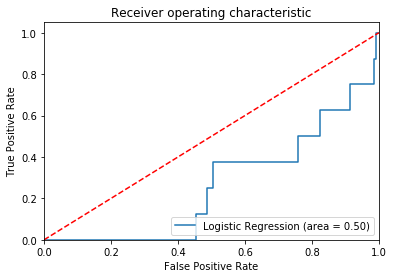

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LRm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, LRm.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

***

# Model 3

**Implemented logistic regression model**  
**Target -**     
- waterfront

**Predictors -**
- view           
- sqft_basement         
- bathrooms    
- floors        
- price

In [96]:
X=df[["view","sqft_basement","bathrooms","floors","price"]]
Y=df[['waterfront']]

In [97]:
# setting Logistic regression classifier
# scikit-learn includes the intercept.

lr = LogisticRegression(C=1e9)

#dividing data to have a training and a testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= .2, random_state=0)

# Logistic regression metrics
LRm = lr.fit(x_train, y_train)



LRm.predict_proba(x_test)  # The returned estimates for all classes are ordered by the label of classes.

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.92544077, 0.07455923],
       [0.97684855, 0.02315145],
       [0.75489175, 0.24510825],
       ...,
       [0.67477547, 0.32522453],
       [0.98929317, 0.01070683],
       [0.86665624, 0.13334376]])

In [98]:
LRm.coef_

array([[ 7.09970789e-04, -6.85204636e-04, -1.85578354e-03,
        -1.55299293e-03, -8.68415761e-06]])

In [99]:
LRm.intercept_

array([-0.0012093])

In [100]:
LRm.decision_function(x_test) # Predict confidence scores for samples.

array([-2.51867629e+00, -3.74227410e+00, -1.12487441e+00, -5.21696842e+00,
       -1.12820706e+01, -1.28987340e+00, -4.16189123e+00, -4.54566094e+00,
       -3.51346147e+00, -1.13433695e+01, -3.92516483e+00, -5.48274413e+00,
       -8.69404024e+00, -4.91550379e+00, -2.96148149e+00, -1.52434566e+00,
       -7.50303851e+00, -4.12199423e+00, -1.37313156e+01, -1.61211513e+00,
       -4.22077118e+00, -6.08690907e+00, -2.93939223e+00, -3.09183069e+00,
       -6.23384374e+00, -3.65785393e+00, -6.22202036e-01, -5.83927099e+00,
       -1.78487039e+00, -4.35059934e+00, -8.77605310e+00, -4.13513761e+00,
       -6.88495178e+00, -6.22050706e+00, -3.78361847e+00, -4.13104425e+00,
       -3.06869528e+00, -2.66679346e+00, -5.99668682e+00, -4.61140688e+00,
       -4.47916627e+00, -3.48500987e+00, -3.53092882e+00, -8.37365430e+00,
       -5.25853343e+00, -5.65577705e+00, -4.08105433e+00, -8.43351551e+00,
       -5.89114220e+00, -3.91673883e+00, -4.09053856e+00, -6.04490823e+00,
       -4.95892458e+00, -

In [90]:
LRm.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [101]:
y_pred = LRm.predict(x_test)
print("Accuracy score using Logistic regression is %s" %metrics.accuracy_score(y_test, y_pred))

print("RMSE is %s" %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy score using Logistic regression is 0.991304347826087
RMSE is 0.09325048082403138


In [102]:
#confusion matrix
confusion_matrix(y_test, y_pred) 
#The confusion matrix shows that therer are 36 true positives for males on either axes and 4 for females versus males axes which
# is in sync with the plot of females and males shown before.

array([[912,   0],
       [  8,   0]], dtype=int64)

In [103]:
#Classification Report
target_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       912
           1       0.00      0.00      0.00         8

   micro avg       0.99      0.99      0.99       920
   macro avg       0.50      0.50      0.50       920
weighted avg       0.98      0.99      0.99       920



C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


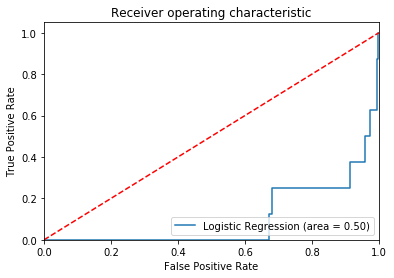

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LRm.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, LRm.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

***

# Cross Validation

In [124]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, Y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, Y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_

K-fold cross-validation results:
LogisticRegression average accuracy is 0.992
LogisticRegression average log_loss is 0.107
LogisticRegression average auc is 0.256


C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\v

In [125]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, Y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.992 (+/-0.003)
LogisticRegression average log_loss: 0.107 (+/-0.072)
LogisticRegression average auc: 0.256 (+/-0.123)


C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_

### Findings 
Model 1 Accuracy score using Logistic regression is 0.9918478260869565
RMSE is 0.0902893898143269

Model 2 Accuracy score using Logistic regression is 0.991304347826087
RMSE is 0.09325048082403138

Model 3 Accuracy score using Logistic regression is 0.991304347826087
RMSE is 0.09325048082403138

All three models have just slight shange in accuracy and rmse values.

# Answer the following question

1) Is the relationship significant?     
Yes, the relationship between the dependent variable 'price' and the independent variables 'sqft_living',sqft_above','bedrooms' and 'sqft_basement' is significant as we have p-value of zero which shows that the slope is not zero for any random data and the model will predict the price of the houses based on the input of the independent variables.

2) Are any model assumptions violated?       
The dependent variable waterfront is binary variable.   
There is slight multi colinaerity between the independent variables.    
Variables are slighthly dependent on eachother.    
The sample size is not much large.    

4) Does the model make sense?  Interpret the meaning of each independent variable.      
No, The model is not making much sense as the accuracy and rmse  values are too good to be true.  
Maximum accuracy obtained is ~ 99% which is overfitting.

5) Cross-validate the model. How well did it do?        
Yes, Completed the cross validation process with 10 fold and the error reduced after increasing the number of folds.
Average accuracy given is 0.992 which can be slight overfitted model.    




***

## Contribution

Self- 60%
External - 40%

## Citations

- https://www.kaggle.com/ariadne/simple-one-feature-linear-regression
- https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

## License

Copyright 2019 Apurva Nivargi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.